### Library

In [1]:
import numpy as np
import torch
import torch.nn as nn


import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from tqdm import tqdm
from l2dst_lib.lst_nn import LST_1, LST_2,ResLST

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Working on device {device}")


Working on device cpu


# Load dataset

In [3]:
# Transform image to 1x784 and normalize colors
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

path_to_MNIST = '../../Datasets'

# Download/load dataset
testset = datasets.MNIST(path_to_MNIST, download=False, train=False, transform=transform)


# Create dataloaders
test_loader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False) 

In [7]:
def acc_eval(model, device, test_loader):
    model.to(device)

    correct = 0
    total = 0

    model.eval()
    for X, y_true in test_loader:
        X = X.squeeze(1) 
        X = X.to(device)
        y_true = y_true.to(device)
        
        outputs = model(X)
        _,y_pred = torch.max(outputs, dim=1)
        total +=y_true.shape[0]
        correct +=int((y_pred==y_true).sum())

    print(f"Accuracy = {correct/total: .4f}")

# LST-1 test

In [8]:
input_size = 28  # 28x28 images flattened
output_size = 10  # 10 classes for digits 0-9

model = LST_1(input_size, output_size, device=device)

model.load_state_dict(torch.load(f'models\LST_1_epoch_300.pth', map_location=torch.device('cpu'))) #

acc_eval(model, device, test_loader)

pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of parameters =', pytorch_total_params)

c:\Users\m.vashkevich\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Accuracy =  0.9802
Number of parameters = 9474


# LST-2 test

In [15]:
input_size = 28  # 28x28 images flattened
hidden_size = 28
output_size = 10  # 10 classes for digits 0-9

model = LST_2(input_size, hidden_size, output_size, device=device)

model.load_state_dict(torch.load(f'models\LST_2_epoch_300.pth', map_location=torch.device('cpu'))) #

acc_eval(model, device, test_loader)

pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of parameters =', pytorch_total_params)

Accuracy =  0.9836
Number of parameters = 11098


# ResLST-3 test

In [ ]:
input_size = 28  # 28x28 images flattened
hidden_size = 28
output_size = 10  # 10 classes for digits 0-9

model = ResLST(input_size, hidden_size, output_size, device=device)

model.load_state_dict(torch.load(f'models\ResLST_epoch_300.pth', map_location=torch.device('cpu'))) #

acc_eval(model, device, test_loader)

pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of parameters =', pytorch_total_params)

c:\Users\m.vashkevich\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Accuracy =  0.9853
Number of parameters = 12722


# Visualization

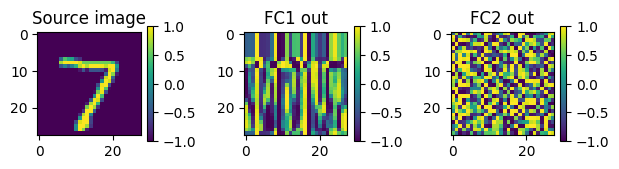

In [23]:
input_size = 28  # 28x28 images flattened
output_size = 10  # 10 classes for digits 0-9

model = LST_1(input_size, output_size, device=device)

model.load_state_dict(torch.load(f'models\LST_1_epoch_300.pth', map_location=torch.device('cpu'))) #
model.to(device)

img, label = testset[0]
img = img.to(device)


e1,e2 = model.get_embeddings(img)

fig, ax = plt.subplots(figsize=(7,1.5), nrows=1, ncols=3)
plt.subplot(1,3,1)
plt.imshow(img.squeeze(0).detach().cpu(), vmin=-1, vmax=1)
plt.title('Source image')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(e1.squeeze(0).detach().cpu(), vmin=-1, vmax=1)
plt.title('FC1 out')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(e2.squeeze(0).detach().cpu(), vmin=-1, vmax=1)
plt.title('FC2 out')
plt.colorbar()

plt.subplots_adjust(wspace=0.6) 

# Saving results
image_name = f'../img/LST_l_embedding_digit_7.png'
fig.savefig(image_name, format='png', bbox_inches='tight', pad_inches = 0.2) # dpi=250,